In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [76]:
x= 6*np.random.rand(100,1) - 3
y = 0.5 + x**2 + 1.5*x + 2 + np.random.randn(100,1)

Text(0, 0.5, 'Y ')

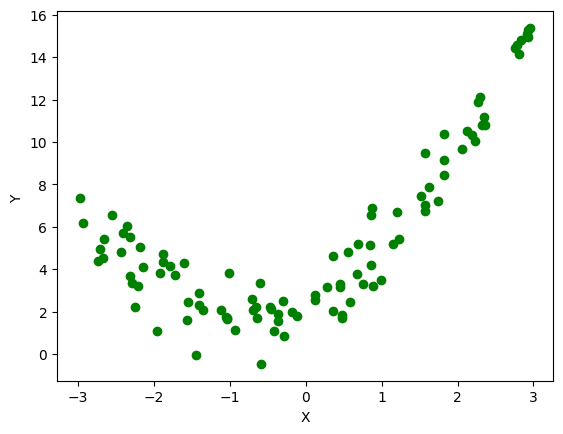

In [77]:
plt.scatter(x,y,color='g')
plt.xlabel('X')
plt.ylabel('Y ')


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [80]:
slr.fit(x_train,y_train)

LinearRegression()

In [81]:
from sklearn.metrics import r2_score
score = r2_score(y_test,slr.predict(x_test))
print(score)

0.508161758654909


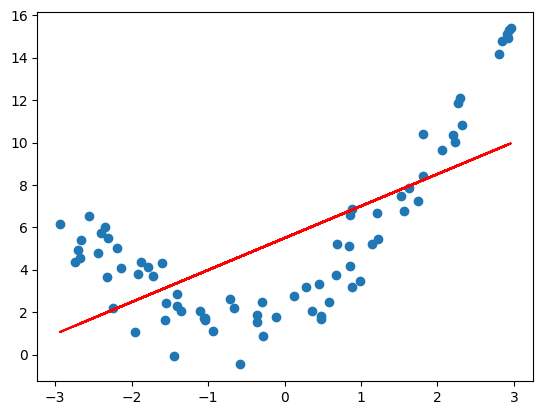

In [82]:
plt.plot(x_train,slr.predict(x_train),color='r')
plt.scatter(x_train,y_train)

In [83]:
# now getting best fit line using polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly= PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [85]:
plr = LinearRegression()
plr.fit(x_train_poly,y_train)
y_pred= plr.predict(x_test_poly)
newScore = r2_score(y_test,y_pred)
print(newScore)


0.942496470513946


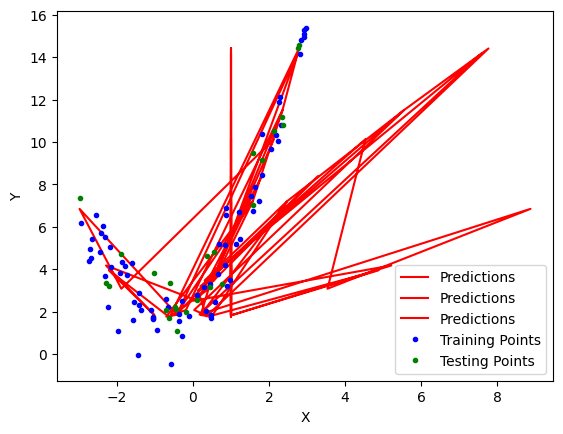

In [86]:

plt.plot(x_test_poly,y_pred,"r-",label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [87]:
#inclreasingt the degree
poly= PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [88]:
x_train_poly.size

300

In [89]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9424090936350565


In [90]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly= poly.transform(x_new)

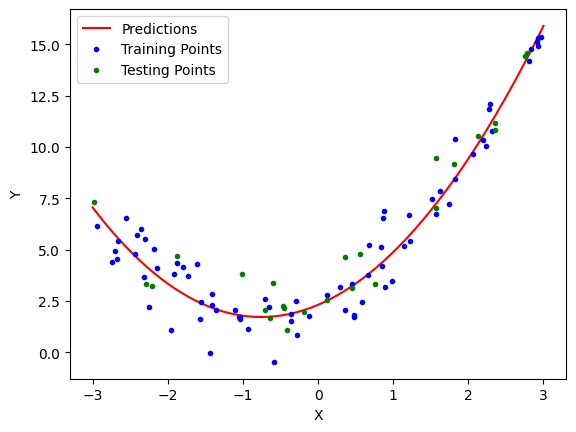

In [91]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()